In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load BioPlex Interactions

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter

# path to working dir
BioPlex_dir = '/n/data1/hms/dbmi/farhat/Roger/CCB/BioPlex'

In [3]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=3
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=True
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 12})

## [1] Baits

In [146]:
# load list of all "baits" targeted for AP-MS in 293T cells (Gene Symbol & Entrez Gene ID for proteins targeted as baits; number of interacting proteins identified)
BioPlex_baits_df = pd.read_csv(f'{BioPlex_dir}/data/baits/BioPlex_3.0_HEK293T_baits.csv', sep = ',')

In [147]:
BioPlex_baits_df.head()

,Bait_Symbol,Entrez_gene_ID,Num_Interactors
0,A1BG,1,9
1,NAT2,10,5
2,ADA,100,2
3,AKT3,10000,13
4,NR2E3,10002,2


In [148]:
np.shape(BioPlex_baits_df)

(10128, 3)

In [149]:
bait_Entrez_Gene_ids = set(BioPlex_baits_df.Entrez_gene_ID)

How many **baits** had **zero** interactors?

In [150]:
np.shape(BioPlex_baits_df[BioPlex_baits_df.Num_Interactors == 0])

(78, 3)

Distribution of **Number of Interactions** for each **bait**

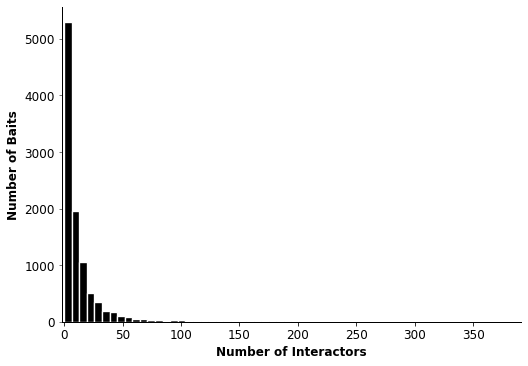

In [151]:
fig , ax = plt.subplots()

n , bins , patches = plt.hist(BioPlex_baits_df.Num_Interactors , bins = 60 , color = 'k' , rwidth = 1.0 , edgecolor='white', linewidth=1.35)

# plt.title('Number of Isolates Each SNP is Found in', fontweight = 'bold' , fontsize = 12, color = 'k')
plt.xlabel('Number of Interactors', fontweight = 'bold' , fontsize = 12, color = 'k')
plt.ylabel('Number of Baits', fontweight = 'bold' , fontsize = 12, color = 'k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(labelcolor = 'k')
#ax.set_yscale("log", nonposy='clip')
ax.set_xlim(-2, BioPlex_baits_df.Num_Interactors.max() + 2)

fig = plt.gcf()
fig.set_size_inches(7.5, 5.25)
fig.tight_layout()

plt.tick_params(axis='y', which='major', labelsize=12 , labelcolor = 'k')
plt.tick_params(axis='x', which='major', labelsize=12 , labelcolor = 'k')

#file_name = '/home/rv76/Farhat_Lab/Figures/Final_5/Scraping_rollingDB/Mean_Coverage_Distribution_across_all_isolates.pdf'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

##  [2] Merge *baits* with corresponding *ORF* sequences

Load **ORFeome** seqs & annotation

In [152]:
ORFeome_df = pd.read_pickle(f'{BioPlex_dir}/data/pickled_files/ORFeome_seqs_df.pkl')

In [153]:
ORFeome_df.head(n=3)

,ORF_ID,ORF_size,template_acc,Entrez_gene_ID,match,SEQ
0,403,159,"BC009508.2, BC010491.1",112597,PERFECT_MATCH,"(A, T, G, A, C, A, G, A, C, A, C, C, G, A, A, ..."
1,228,135,BC016025.1,9168,PERFECT_MATCH,"(A, T, G, G, C, A, G, A, C, A, A, A, C, C, A, ..."
2,52615,156,"BC031105.1, BC107049.2",222659,PERFECT_MATCH,"(A, T, G, C, A, G, C, T, G, A, G, A, C, A, C, ..."


In [154]:
np.shape(ORFeome_df)

(12583, 6)

Some Entrez gene IDs map to multiple ORFs

In [155]:
num_ORFs_per_gene_ID = pd.Series(Counter(ORFeome_df.Entrez_gene_ID))

In [156]:
sum(num_ORFs_per_gene_ID == 1)

10344

In [157]:
sum(num_ORFs_per_gene_ID > 1)

1094

In [158]:
ORFeome_seq_Entrez_gene_IDs = set(list(num_ORFs_per_gene_ID.index))

In [159]:
len(ORFeome_seq_Entrez_gene_IDs)

11438

**Baits**

In [160]:
BioPlex_baits_df.head(n=3)

,Bait_Symbol,Entrez_gene_ID,Num_Interactors
0,A1BG,1,9
1,NAT2,10,5
2,ADA,100,2


In [161]:
np.shape(BioPlex_baits_df)

(10128, 3)

In [162]:
BioPlex_bait_Entrez_gene_IDs = set(list(BioPlex_baits_df.Entrez_gene_ID))

In [163]:
len(BioPlex_bait_Entrez_gene_IDs)

10128

#### PROBLEM - several *baits* do not have a corresponding *ORF* when mapped using Entrez gene IDs

In [165]:
len(BioPlex_bait_Entrez_gene_IDs - ORFeome_seq_Entrez_gene_IDs)

1403

In [168]:
len(ORFeome_seq_Entrez_gene_IDs.intersection(BioPlex_bait_Entrez_gene_IDs))

8725

In [166]:
len(ORFeome_seq_Entrez_gene_IDs - BioPlex_bait_Entrez_gene_IDs)

2713

#### Left merge the *bait* Entrez gene IDs with the corresponding *ORF seq* Entrez gene IDs

In [169]:
BioPlex_baits_df = BioPlex_baits_df.merge(ORFeome_df, how = 'left', on = 'Entrez_gene_ID')

In [170]:
BioPlex_baits_df.head(n=10)

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
0,A1BG,1,9,10134,1122,BC035719.1,PERFECT_MATCH,"(A, T, G, G, C, G, C, C, A, G, T, G, T, C, C, ..."
1,NAT2,10,5,7722,873,BC015878.1,PERFECT_MATCH,"(A, T, G, G, A, C, A, T, T, G, A, A, G, C, A, ..."
2,ADA,100,2,4768,1092,"BC007678.2, BC040226.1",PERFECT_MATCH,"(A, T, G, G, C, C, C, A, G, A, C, G, C, C, C, ..."
3,AKT3,10000,13,56787,1398,BC121154.2,PERFECT_MATCH,"(A, T, G, A, G, C, G, A, T, G, T, T, A, C, C, ..."
4,NR2E3,10002,2,11340,969,BC041421.1,PERFECT_MATCH,"(A, T, G, T, G, C, C, C, C, G, T, G, G, A, C, ..."
5,NAALADL1,10004,3,NaN,NaN,NaN,NaN,NaN
6,GUSBP9,100049076,0,56159,273,BC104473.1,PERFECT_MATCH,"(A, T, G, G, T, G, A, T, T, G, C, T, C, A, C, ..."
7,ACOT8,10005,4,53919,960,"BC117155.1, BC117157.1",PERFECT_MATCH,"(A, T, G, T, C, G, T, C, C, C, C, G, C, A, G, ..."
8,GNPDA1,10007,6,626,870,"BC012853.2, BC022322.1",PERFECT_MATCH,"(A, T, G, A, A, G, C, T, C, A, T, C, A, T, C, ..."
9,GNPDA1,10007,6,12810,870,BC020769.1,PERFECT_MATCH,"(A, T, G, A, A, G, C, T, C, A, T, C, A, T, C, ..."


In [171]:
np.shape(BioPlex_baits_df)

(11189, 8)

### [2.1] Baits that *do not* map to any ORFs

In [172]:
BioPlex_baits_no_ORFs_dfs = BioPlex_baits_df[BioPlex_baits_df.ORF_ID.isnull()]

In [173]:
BioPlex_baits_no_ORFs_dfs.head()

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
5,NAALADL1,10004,3,NaN,NaN,NaN,NaN,NaN
14,GAGE8,100101629,10,NaN,NaN,NaN,NaN,NaN
15,SRA1,10011,7,NaN,NaN,NaN,NaN,NaN
28,HCN4,10021,4,NaN,NaN,NaN,NaN,NaN
34,WASH1,100287171,12,NaN,NaN,NaN,NaN,NaN


In [174]:
np.shape(BioPlex_baits_no_ORFs_dfs)

(1403, 8)

**drop** baits that have no corresponding ORFs

In [175]:
bait_has_ORF_filter = [not no_ORF_for_bait for no_ORF_for_bait in BioPlex_baits_df.ORF_ID.isnull()]
BioPlex_baits_df = BioPlex_baits_df[bait_has_ORF_filter]
BioPlex_baits_df.reset_index(inplace = True, drop = True)

In [176]:
BioPlex_baits_df.head()

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
0,A1BG,1,9,10134,1122,BC035719.1,PERFECT_MATCH,"(A, T, G, G, C, G, C, C, A, G, T, G, T, C, C, ..."
1,NAT2,10,5,7722,873,BC015878.1,PERFECT_MATCH,"(A, T, G, G, A, C, A, T, T, G, A, A, G, C, A, ..."
2,ADA,100,2,4768,1092,"BC007678.2, BC040226.1",PERFECT_MATCH,"(A, T, G, G, C, C, C, A, G, A, C, G, C, C, C, ..."
3,AKT3,10000,13,56787,1398,BC121154.2,PERFECT_MATCH,"(A, T, G, A, G, C, G, A, T, G, T, T, A, C, C, ..."
4,NR2E3,10002,2,11340,969,BC041421.1,PERFECT_MATCH,"(A, T, G, T, G, C, C, C, C, G, T, G, G, A, C, ..."


In [177]:
np.shape(BioPlex_baits_df)

(9786, 8)

### [2.2] Baits that map to multiple ORFs vs. Baits that map to only one ORF
- will appear as multiple Entrez gene ID row entries **or** appear as a single Entrez gene ID row entries

In [178]:
num_ORFs_per_bait = pd.Series(Counter(BioPlex_baits_df.Entrez_gene_ID))
num_ORFs_per_bait.sort_values(ascending = False, inplace = True)

In [179]:
num_ORFs_per_bait.head(n=2)

4869     3
55092    3
dtype: int64

In [180]:
num_ORFs_per_bait.tail(n=2)

283643    1
9993      1
dtype: int64

In [181]:
np.shape(num_ORFs_per_bait) #number of unique Entrez gene IDs represented

(8725,)

In [182]:
num_ORFs_per_bait.sum()

9786

1,012 baits (Entrez gene IDs) map to multiple ORFs

In [183]:
sum(num_ORFs_per_bait > 1)

1012

In [188]:
bait_Entrez_gene_IDs_multiple_ORFs = set(num_ORFs_per_bait[num_ORFs_per_bait > 1].index)
bait_Entrez_gene_IDs_multiple_ORFs_filter = [(bait_Entrez_ID in bait_Entrez_gene_IDs_multiple_ORFs) for bait_Entrez_ID in BioPlex_baits_df.Entrez_gene_ID]

In [190]:
BioPlex_baits_df[bait_Entrez_gene_IDs_multiple_ORFs_filter].head(n = 6)

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
7,GNPDA1,10007,6,626,870,"BC012853.2, BC022322.1",PERFECT_MATCH,"(A, T, G, A, A, G, C, T, C, A, T, C, A, T, C, ..."
8,GNPDA1,10007,6,12810,870,BC020769.1,PERFECT_MATCH,"(A, T, G, A, A, G, C, T, C, A, T, C, A, T, C, ..."
10,TANK,10010,13,8635,360,BC003388.1,PERFECT_MATCH,"(A, T, G, G, A, T, A, A, A, A, A, C, A, T, T, ..."
11,TANK,10010,13,14482,1278,BC067779.1,PERFECT_MATCH,"(A, T, G, G, A, T, A, A, A, A, A, C, A, T, T, ..."
15,HDAC6,10013,6,8810,441,"BC005872.1, BC011498.1",PERFECT_MATCH,"(A, T, G, A, C, C, T, C, A, A, C, C, G, G, C, ..."
16,HDAC6,10013,6,2397,3192,BC013737.1,PERFECT_MATCH,"(A, T, G, G, A, A, A, C, A, A, C, C, C, A, G, ..."


7,713 baits (Entrez gene IDs) map to a single ORF

In [184]:
sum(num_ORFs_per_bait == 1)

7713

In [191]:
bait_Entrez_gene_IDs_one_ORF = set(num_ORFs_per_bait[num_ORFs_per_bait == 1].index)
bait_Entrez_gene_IDs_one_ORF_filter = [(bait_Entrez_ID in bait_Entrez_gene_IDs_one_ORF) for bait_Entrez_ID in BioPlex_baits_df.Entrez_gene_ID]

In [192]:
BioPlex_baits_df[bait_Entrez_gene_IDs_one_ORF_filter].head(n = 6)

,Bait_Symbol,Entrez_gene_ID,Num_Interactors,ORF_ID,ORF_size,template_acc,match,SEQ
0,A1BG,1,9,10134,1122,BC035719.1,PERFECT_MATCH,"(A, T, G, G, C, G, C, C, A, G, T, G, T, C, C, ..."
1,NAT2,10,5,7722,873,BC015878.1,PERFECT_MATCH,"(A, T, G, G, A, C, A, T, T, G, A, A, G, C, A, ..."
2,ADA,100,2,4768,1092,"BC007678.2, BC040226.1",PERFECT_MATCH,"(A, T, G, G, C, C, C, A, G, A, C, G, C, C, C, ..."
3,AKT3,10000,13,56787,1398,BC121154.2,PERFECT_MATCH,"(A, T, G, A, G, C, G, A, T, G, T, T, A, C, C, ..."
4,NR2E3,10002,2,11340,969,BC041421.1,PERFECT_MATCH,"(A, T, G, T, G, C, C, C, C, G, T, G, G, A, C, ..."
5,GUSBP9,100049076,0,56159,273,BC104473.1,PERFECT_MATCH,"(A, T, G, G, T, G, A, T, T, G, C, T, C, A, C, ..."


## [3] Interactions

_Column Descriptions_
- **GeneA**: Entrez Gene ID for the first interacting protein
- **GeneB**: Entrez Gene ID for the second interacting protein
- **SymbolA**: Symbol for the first interacting protein
- **SymbolB**: Symbol for the second interacting protein
- **p(Wrong ID)**: Probability of wrong protein ID (CompPASS-Plus)
- **p(NotInteractor)**: Probability of nonspecific background (CompPASS-Plus)
- **p(Interactor)**: Probability of high-confidence interaction (CompPASS-Plus)

In [196]:
# load BioPlex 3.0 interactions for HEK293T cell line, 118162 interactions
BioPlex_interactions_df = pd.read_csv(f'{BioPlex_dir}/data/interactions/BioPlex_3.0_interactions_HEK293T_cells.tsv', sep = '\t')

In [197]:
BioPlex_interactions_df.head()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
0,100,728378,P00813,A5A3E0,ADA,POTEF,6.881844e-10,0.000118,0.999882
1,222389,6137,Q8N7W2-2,P26373,BEND7,RPL13,1.340380e-18,0.225664,0.774336
2,222389,5928,Q8N7W2-2,Q09028-3,BEND7,RBBP4,7.221401e-21,0.000064,0.999936
3,222389,25873,Q8N7W2-2,Q9Y3U8,BEND7,RPL36,7.058372e-17,0.128183,0.871817
4,222389,6124,Q8N7W2-2,P36578,BEND7,RPL4,1.632313e-22,0.200638,0.799362


In [198]:
BioPlex_interactions_df.tail()

,GeneA,GeneB,UniprotA,UniprotB,SymbolA,SymbolB,pW,pNI,pInt
118157,51805,2232,Q9NZJ6,P22570-2,COQ3,FDXR,0.008609,0.124730,0.866660
118158,51805,80271,Q9NZJ6,Q96DU7,COQ3,ITPKC,0.000423,0.002139,0.997439
118159,51805,55109,Q9NZJ6,Q8N302,COQ3,AGGF1,0.000001,0.003469,0.996530
118160,51805,197258,Q9NZJ6,Q8N0W3-2,COQ3,FUK,0.211267,0.006931,0.781802
118161,51805,4026,Q9NZJ6,Q93052,COQ3,LPP,0.021881,0.110518,0.867601


In [199]:
BioPlex_interactions_df.shape

(118162, 9)

## [4] Pairs of genes that are not *recipricol* in the network

In [200]:
# find which pairs of genes are not "recipricol" (Gene1 > Gene2 but NOT Gene2 > Gene1) or (Gene2 > Gene1 but NOT Gene1 > Gene2)
unique_GeneA_ids = list(set(BioPlex_interactions_df.GeneA))
unique_GeneB_ids = list(set(BioPlex_interactions_df.GeneB))
all_unique_Gene_ids = set(unique_GeneA_ids + unique_GeneB_ids) # all genes detected in network

In [201]:
len(unique_GeneA_ids)

8995

In [202]:
len(unique_GeneB_ids)

10419

In [203]:
len(all_unique_Gene_ids) # 14,586 proteins reported in Hutten et al Cell 2021

13957

How many of **GeneA** were also **baits**?

In [204]:
np.sum([(gene_i in bait_Entrez_Gene_ids) for gene_i in unique_GeneA_ids])

8995

How many of **GeneB** were also **baits**?

In [205]:
np.sum([(gene_i in bait_Entrez_Gene_ids) for gene_i in unique_GeneB_ids])

5961

**GeneA** is always a **bait**, **GeneB** is always a **prey**

If genes are recipricol then **(GeneA-GeneB + GeneB-GeneA) = 2** else **(GeneA-GeneB + GeneB-GeneA) = 1**

In [206]:
GeneA_GeneB_list = [(str(BioPlex_interactions_df.loc[interaction_i,'GeneA']) + '_' + str(BioPlex_interactions_df.loc[interaction_i,'GeneB'])) for interaction_i in BioPlex_interactions_df.index] # GeneA - GeneB
GeneB_GeneA_list = [(str(BioPlex_interactions_df.loc[interaction_i,'GeneB']) + '_' + str(BioPlex_interactions_df.loc[interaction_i,'GeneA'])) for interaction_i in BioPlex_interactions_df.index] # GeneB - GeneA
gene_pair_recip_count = pd.Series(Counter(GeneA_GeneB_list + GeneB_GeneA_list))

In [207]:
gene_pair_recip_count.sort_values(ascending = True)

100_728378       1
79968_5634       1
1762_5634        1
5635_5634        1
5636_5634        1
                ..
343069_221092    1
343069_4686      1
343069_51340     1
343069_10605     1
4026_51805       1
Length: 236324, dtype: int64

In [208]:
GeneA_GeneB_list[0:5]

['100_728378', '222389_6137', '222389_5928', '222389_25873', '222389_6124']

In [209]:
GeneB_GeneA_list[0:5]

['728378_100', '6137_222389', '5928_222389', '25873_222389', '6124_222389']

Non-redundant list of **bait-prey** pairs! Why? Any **baits** that were found to associate reciprocally had their scores combined

From *Huttlin et al 2015 Cell* : "After filtering, a non-redundant list of bait-prey pairs was assembled...In cases where two baits reciprocally associated with each other, their CompPASS-Plus scores were combined..."